# Learning Curve 2

Realizaremos una curva de aprendizaje para analizar la cantidad de datos que son suficientes para lograr un rendimiento global óptimo del modelo que predice si una estrella es un pulsar o no.

Inicialmente importamos los datos necesarios, provenientes de  https://www.kaggle.com/sharansmenon/pulsar-star-pytorch/data.

### Obtención de datos

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
data = pd.read_csv("/home/anell/Projects/Pulsar-NN/pulsar_stars.csv")

In [3]:
data = data.sample(frac=1)  
data

,Mean-of-the-integrated-profile,Standard-deviation-of the-integrated-profile,Excess-kurtosis-of-the-integrated-profile,Skewness-of-the-integrated-profile,Mean-of-the-DM-SNR-curve,Standard-deviation-of-the-DM-SNR-curve,Excess-kurtosis-of-the-DM-SNR-curve,Skewness-of-the-DM-SNR-curve,target_class
1740,127.367188,51.857960,-0.125432,-0.485281,2.326923,14.775555,10.117050,131.796158,0
10596,87.359375,44.800902,0.921022,1.626216,1.899666,12.323739,11.206985,175.221654,0
3774,52.296875,39.504422,2.605324,9.256109,39.709030,72.787699,1.601763,1.091597,1
7032,133.914062,53.718599,-0.045039,-0.246828,1.035117,9.819803,17.139964,389.481767,0
17500,126.664062,50.460888,0.074933,-0.520260,2.243311,16.298896,9.701440,108.661408,0
...,...,...,...,...,...,...,...,...,...
12385,93.054688,35.872454,0.255631,2.276567,0.385452,9.471101,24.800006,619.446717,0
75,136.742188,44.391238,-0.221925,0.908085,2.105351,14.498377,10.131571,128.395149,0
1190,74.148438,40.887057,0.729262,1.707825,2.807692,22.848157,8.841503,80.670254,0
15267,95.828125,46.053486,0.419592,0.716984,1.593645,12.002944,12.926856,217.550196,0


In [4]:
ejemplos = data.values.tolist()
ejemplos = np.array(ejemplos)

features = ejemplos.transpose()

In [5]:
X = features[0:8]
Y = features[8]

X = X.transpose()

En esta ocasión, para desarrollar la curva de aprendizaje, se crearán dos conjuntos de datos de igual tamaño. 

In [6]:
X_train = X[0:8949]
Y_train = Y[0:8949]

X_cv = X[8949:]
Y_cv = Y[8949:]

In [7]:
X_train.shape, Y_train.shape, X_cv.shape, Y_cv.shape

((8949, 8), (8949,), (8949, 8), (8949,))

### Red neuronal

Entrenaremos la red neuronal variando el tamaño del set de entrenamiento de uno en uno.

In [8]:
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout, Flatten
from keras.layers.merge import concatenate, add
from keras.optimizers import Adam, SGD
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


Armamos la red neuronal

In [9]:
inputs = Input(shape=(8,))

x = Dense(2)(inputs)
x = Activation("relu")(x)

x = Dense(1)(x)
x = Activation("sigmoid")(x)


model = Model(inputs, x)


# Compilación del modelo:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


Ahora ajustaremos y evaluaremos la red para cada tamaño de la muestra. Guardaremos el valor de los costos obtenidos al evaluar el set de entrenamiento y el de validación.

In [12]:
lista_m = [100,500,1000,2500,5000,7000,8948]
lista_Jtrain = []
lista_Jcv = []

In [15]:
for i in lista_m:
    X = X_train[0:i , :]
    Y = Y_train[0:i]
    
    model.fit(X, Y, epochs=20, batch_size=10)
    
    Jtrain, accuracy_train = model.evaluate(X_train[0:i,:], Y_train[0:i])
    
    Jcv, accuracy_cv = model.evaluate(X_cv[0:i, :], Y_cv[0:i])
    
    lista_Jtrain.append(Jtrain)
    lista_Jcv.append(Jcv)

Epoch 1/20
100/100 [==============================] - 6s 56ms/step - loss: 20.6298 - accuracy: 0.0400
Epoch 2/20
100/100 [==============================] - 0s 2ms/step - loss: 19.2092 - accuracy: 0.0400
Epoch 3/20
100/100 [==============================] - 0s 1ms/step - loss: 17.7399 - accuracy: 0.0400
Epoch 4/20
100/100 [==============================] - 0s 1ms/step - loss: 16.3994 - accuracy: 0.0400
Epoch 5/20
100/100 [==============================] - 0s 2ms/step - loss: 15.1408 - accuracy: 0.0500
Epoch 6/20
100/100 [==============================] - 0s 1ms/step - loss: 13.9849 - accuracy: 0.0600
Epoch 7/20
100/100 [==============================] - 0s 2ms/step - loss: 12.9165 - accuracy: 0.0700
Epoch 8/20
100/100 [==============================] - 0s 2ms/step - loss: 11.9104 - accuracy: 0.0700
Epoch 9/20
100/100 [==============================] - 0s 2ms/step - loss: 10.9873 - accuracy: 0.0700
Epoch 10/20
100/100 [==============================] - 0s 2ms/step - loss: 10.1042 - accur

2500/2500 [==============================] - 4s 1ms/step - loss: 0.1010 - accuracy: 0.9736
Epoch 18/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0988 - accuracy: 0.9744
Epoch 19/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0990 - accuracy: 0.9736
Epoch 20/20
2500/2500 [==============================] - 1s 232us/step
Epoch 1/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0951 - accuracy: 0.9744
Epoch 2/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0932 - accuracy: 0.9754
Epoch 3/20
5000/5000 [==============================] - 5s 1ms/step - loss: 0.0915 - accuracy: 0.9750
Epoch 4/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0906 - accuracy: 0.9748
Epoch 5/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0898 - accuracy: 0.9760
Epoch 6/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0879 - accuracy: 0.9760
Epoch 7/20
5000/5000

### Visualización curva de aprendizaje

Importamos la librería necesaria

In [16]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Costo')

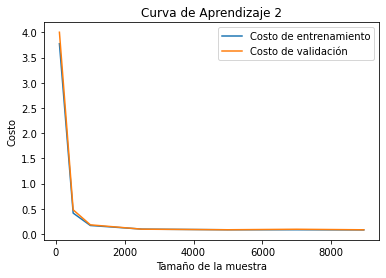

In [17]:
plt.plot(lista_m,lista_Jtrain, label = "Costo de entrenamiento")
plt.plot(lista_m,lista_Jcv,label = "Costo de validación")
plt.legend()
plt.title("Curva de Aprendizaje 2")
plt.xlabel("Tamaño de la muestra")
plt.ylabel("Costo")